# Wizualizacja

### Celem jest poznanie podstaw koniecznych do tworzenia wizualizacji. 

Wizualizacja jest bardzo ważnym tematem chociażby dlatego, że jest to obszar, w którym człowiek potrafi wyciągnąć błyskawiczne wnioski. Pamiętasz to przysłowie - “Lepiej raz zobaczyć niż sto razy usłyszeć”? To właśnie za pomocą zrobionych wykresów można "zobaczyć" rozwiązanie.

Z drugiej strony, warto zrozumieć, że wykresy są tworzone dla ludzi, maszyna ich nie potrzebuje. Innymi słowy, dla modelu wszystko wygląda jak wykres, on używa metryki sukcesu jako kierunku optymalizacji.

Temat wizualizacji jest ogromny - dlatego my tutaj zajmiemy się tylko wycinkiem tego obszaru, ale warto od czegoś zacząć.

Jeśli dotykasz tematu wizualizacji po raz pierwszy, to nie musisz rozumieć wszystkiego. Poznaj przynajmniej nazwy i jak te wykresy powstają. Daruj sobie na początek badanie, czym są wykresy `.kdeplot()`. Oczywiście to może kiedyś się przyda, ale celem tego notebooku jest coś innego.

Plan minimum jest taki, że masz poznać:
- `.plot()` czyli liniowy
- `.hist()`, czyli histogram
- `.scatterplot()`, czyli scatterplot

In [1]:
import numpy as np
import pandas as pd

import sklearn.datasets as d

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.ticker import NullLocator, FixedLocator, LogLocator, MultipleLocator

%matplotlib inline

## Linia

Funkcja `.plot()` oczekuje na dwa parametry x i y, natomiast jeśli został podany tylko jeden, czyli został podany w formie jednej listy, to traktuje to jako `y`, a wszystkie `x` wypełnia inkrementalnie. Możesz o tym myśleć w ten sposób, że wartości `x` to są indeksy `y`.

#### Na przykład: `y[0]=3 => x=0, y=3`.

Ten sam wynik, ale już jawnie podając `x`.

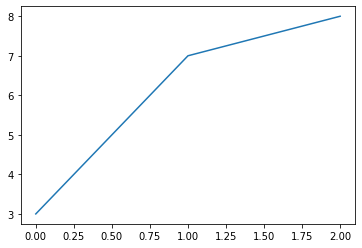

In [3]:
plt.plot([0, 1, 2], [3, 7, 8]);

Znak `;` na końcu powoduje usunięcie opisu z biblioteki `matplotlib`. Możesz usunąć `;` i zobaczyć, co się pojawi.

Warto zwrócić uwagę, że domyślny kolor linii to niebieski. W dalszej części pokażę, jak można zmienić kolor.

Zróbmy teraz bardziej złożony wykres. Funkcja `f(x)` będzie nam generować wartości na osi x od 0 do 10 i będzie tych punktów 100.

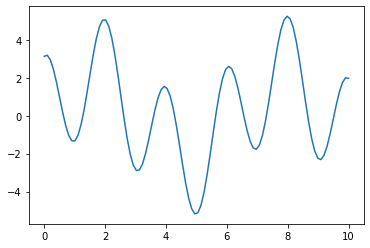

In [4]:
#jakaś "ładna" funkcja
def f(x):
    return np.pi*np.sin(x) + np.pi*np.cos(np.pi * x) + np.sin(x + np.pi)


x = np.linspace(0, 10, 100) # generuję 100 punktów między 0 i 10
y = f(x)

plt.plot(x, y);

## Trochę więcej kontroli nad wykresem

### Kolor linii

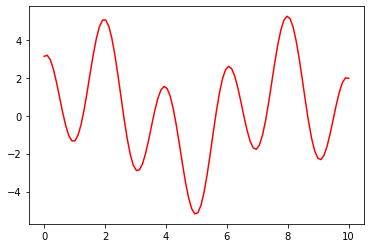

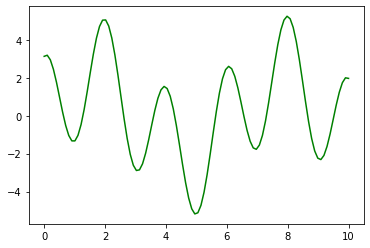

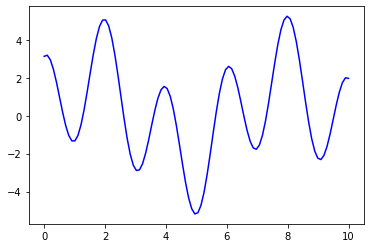

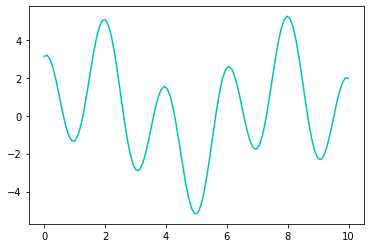

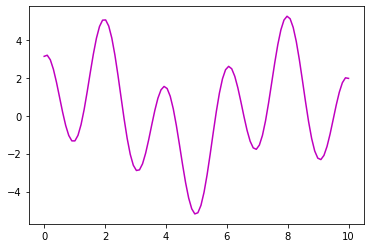

In [5]:
for color in ['r', 'g', 'b', 'c', 'm']: 
    plt.plot(x, y, color=color) #parametr "color" lub skrócona wersja "c". Możesz sprawdzić, podając `c=color`.
    plt.show()

### Rodzaj linii

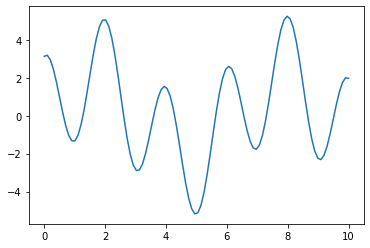

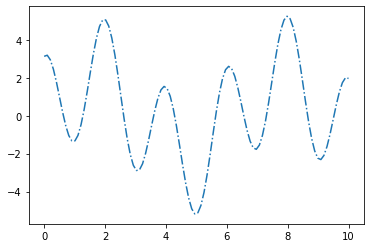

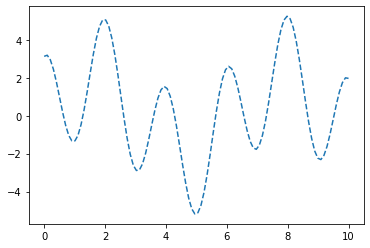

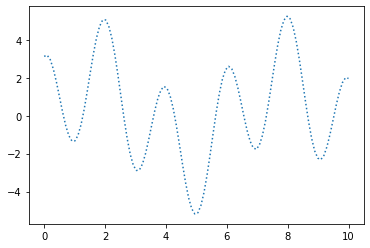

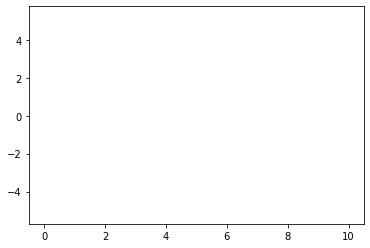

In [6]:
for line_style in ['-', '-.', '--', ':', '']: #pusty string oznacza "żaden"
    plt.plot(x, y, linestyle=line_style) #parameter "linestyle" lub skrócona wersja "ls"
    plt.show()

### Punkty (marker w terminologii matplotlib)

.	point


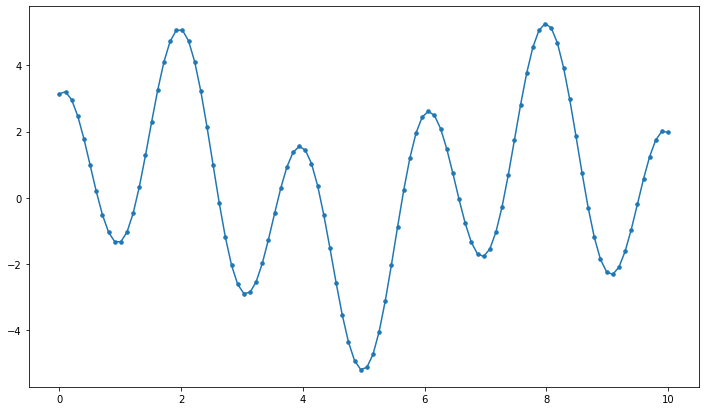

,	pixel


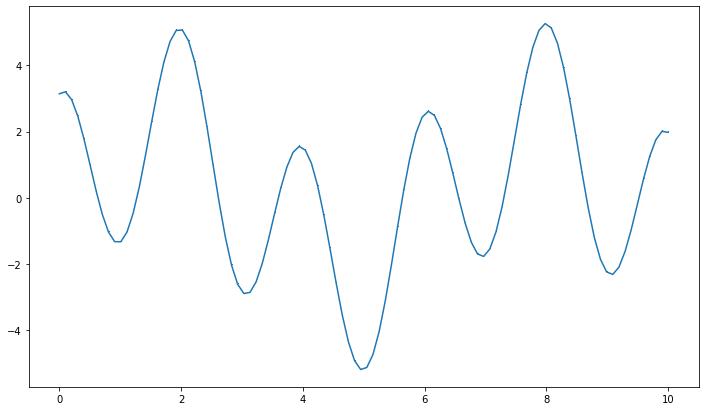

o	circle


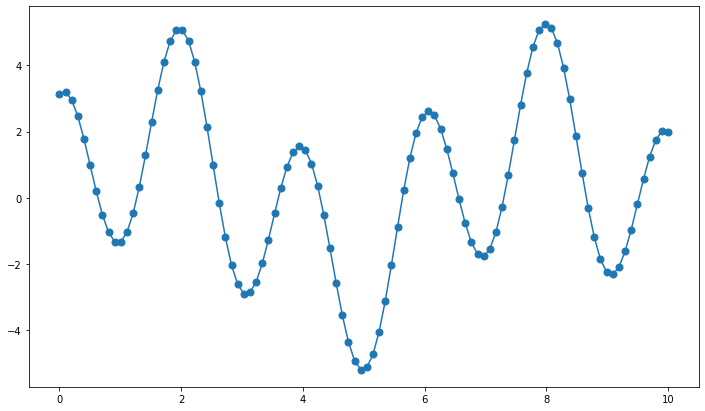

v	triangle_down


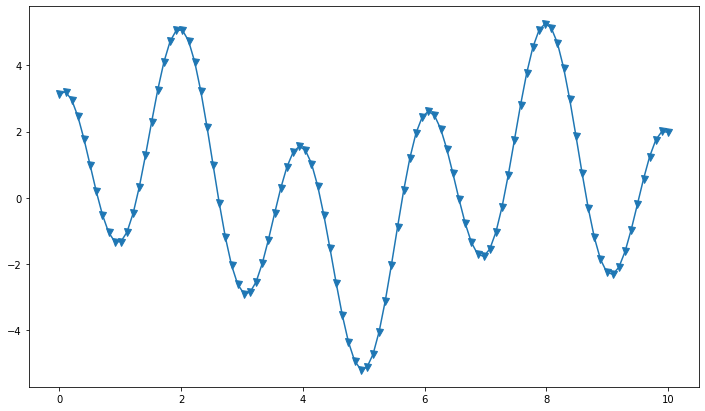

^	triangle_up


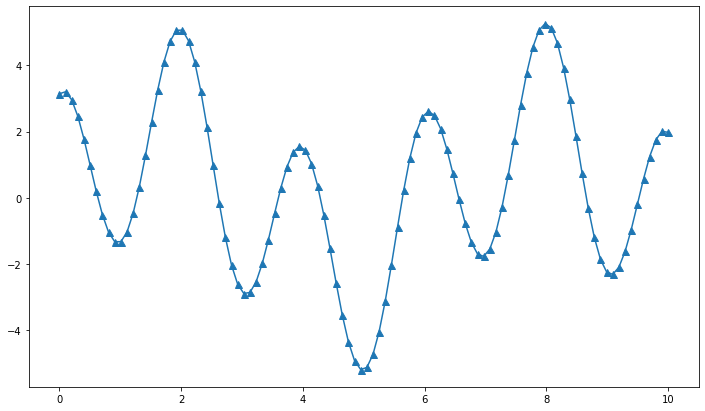

<	triangle_left


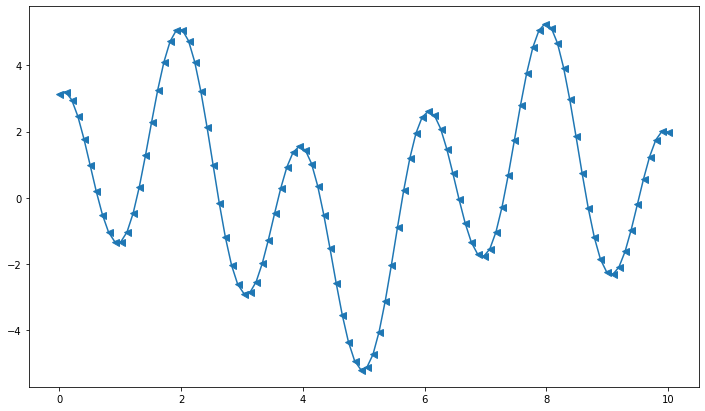

>	triangle_right


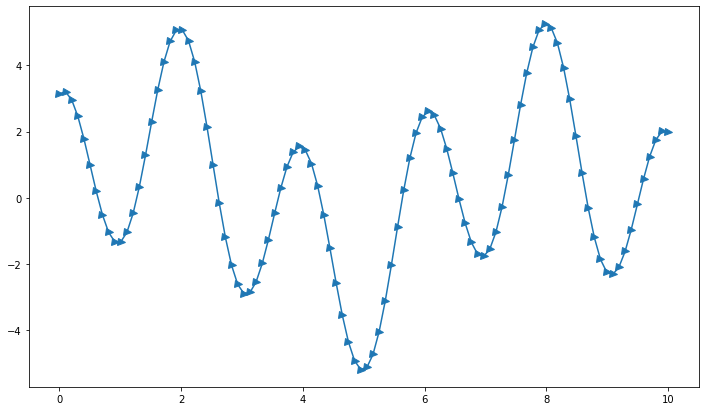

1	tri_down


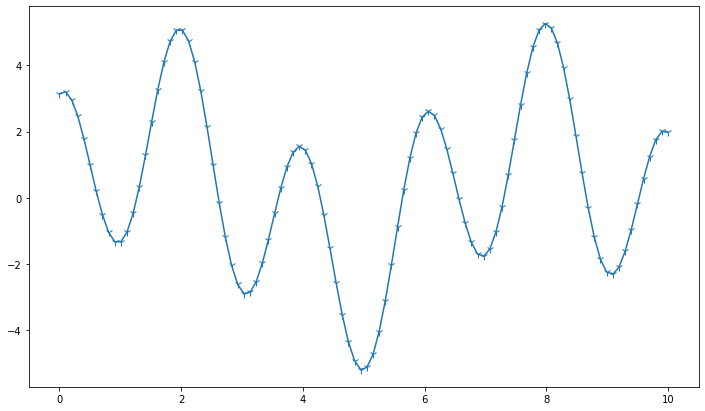

2	tri_up


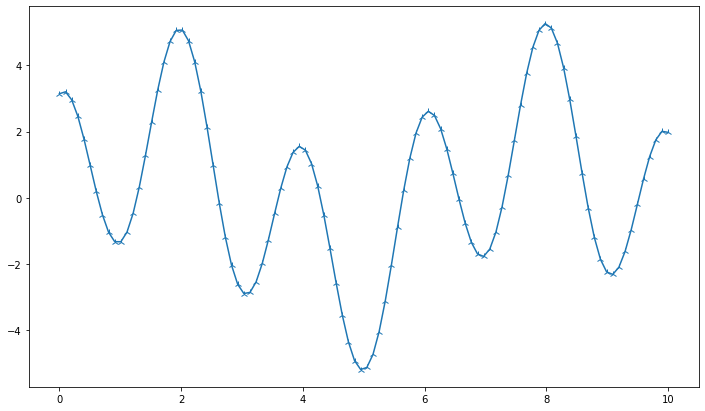

3	tri_left


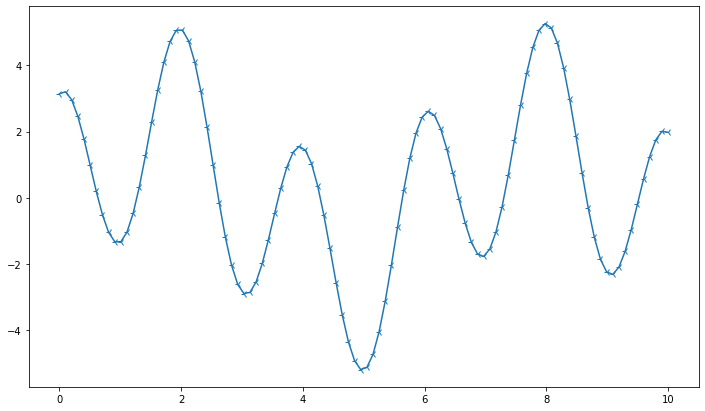

4	tri_right


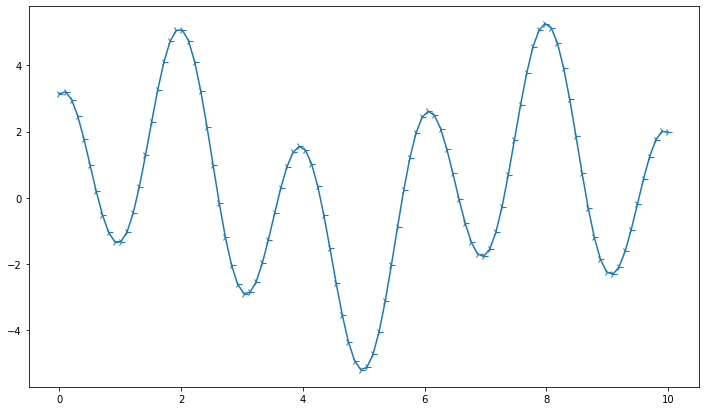

8	octagon


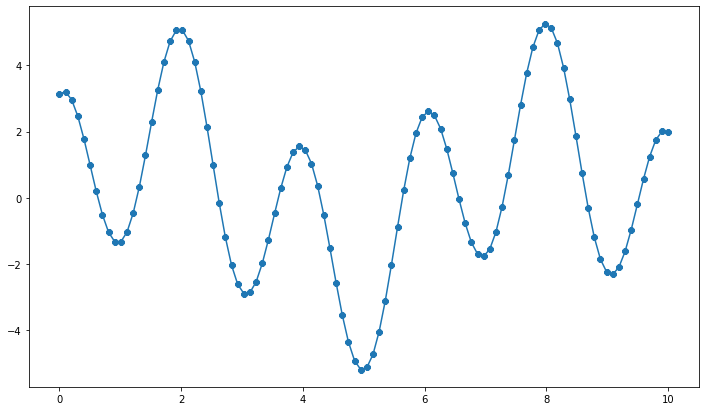

s	square


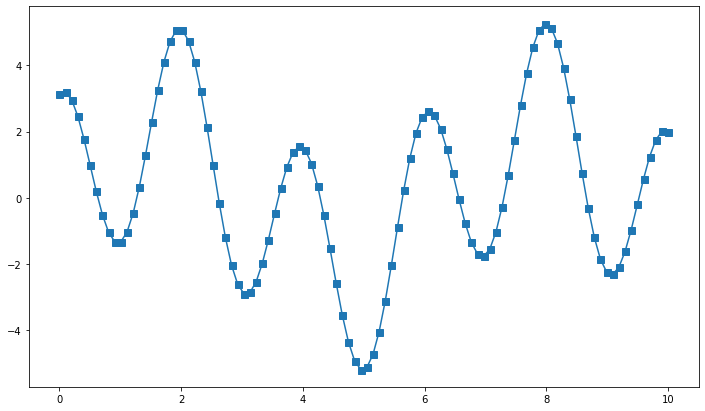

p	pentagon


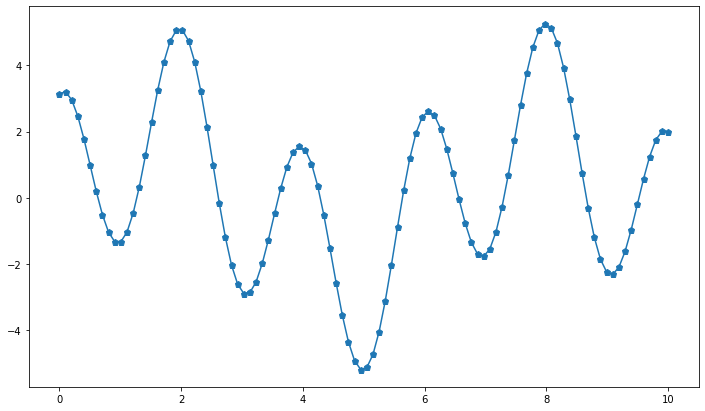

*	star


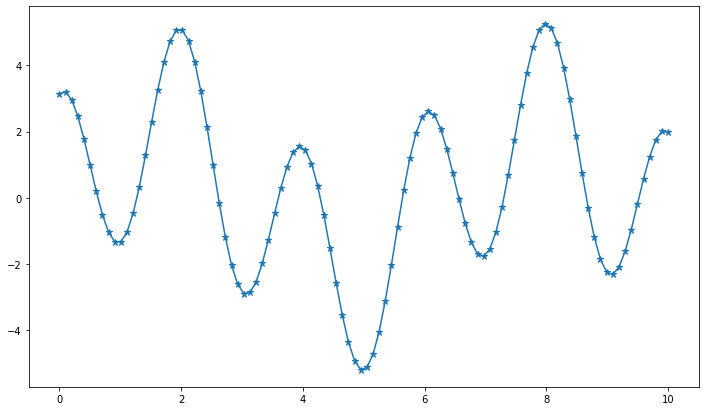

h	hexagon1


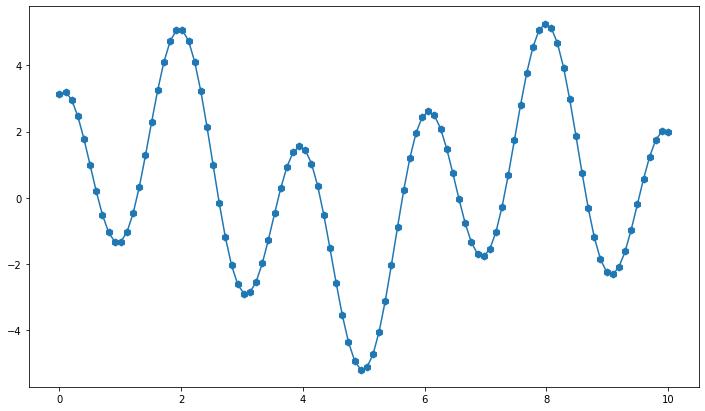

H	hexagon2


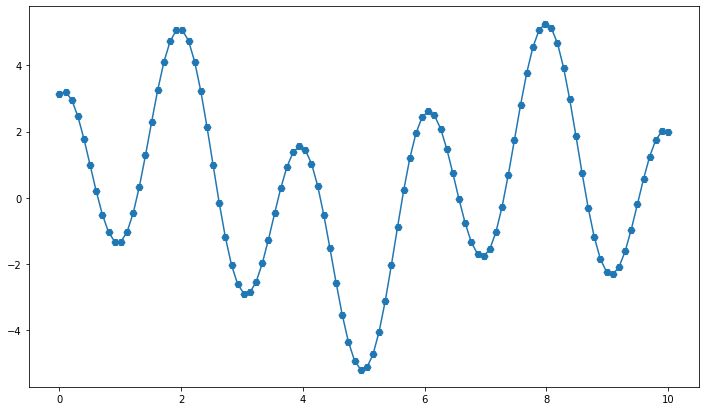

+	plus


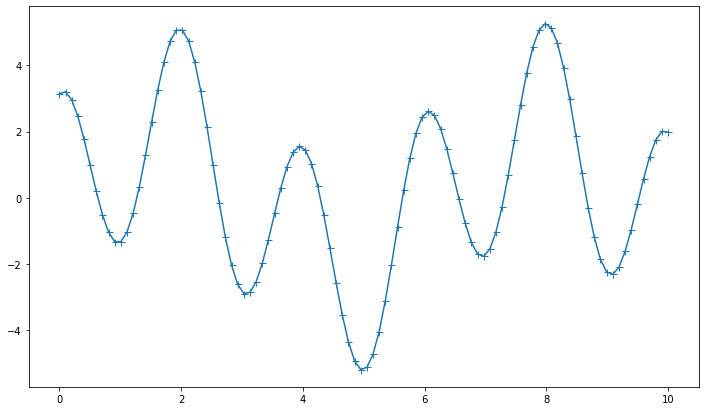

x	x


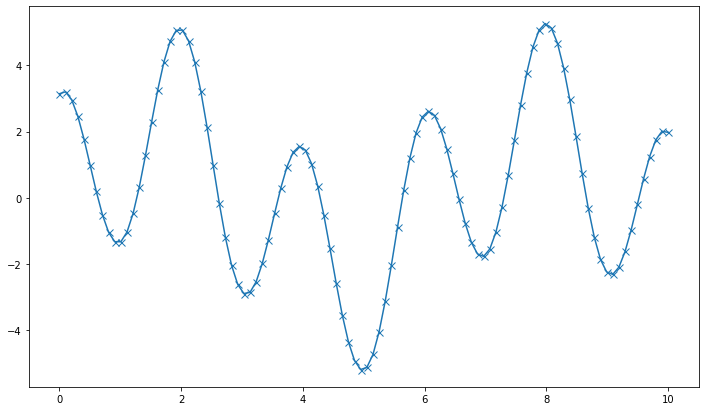

D	diamond


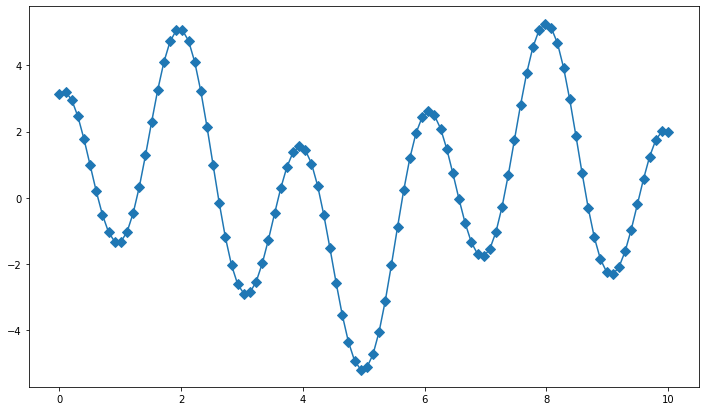

d	thin_diamond


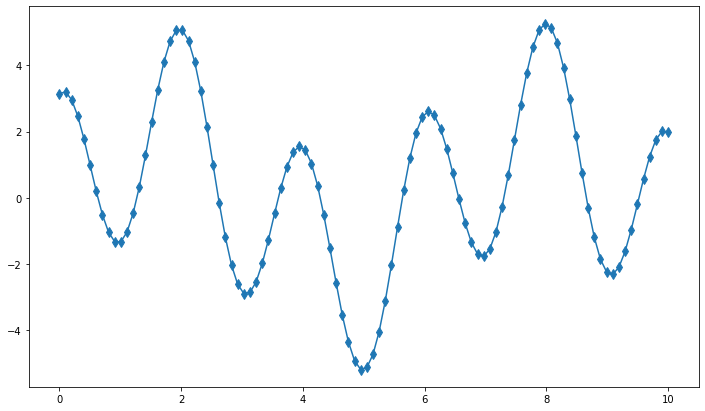

|	vline


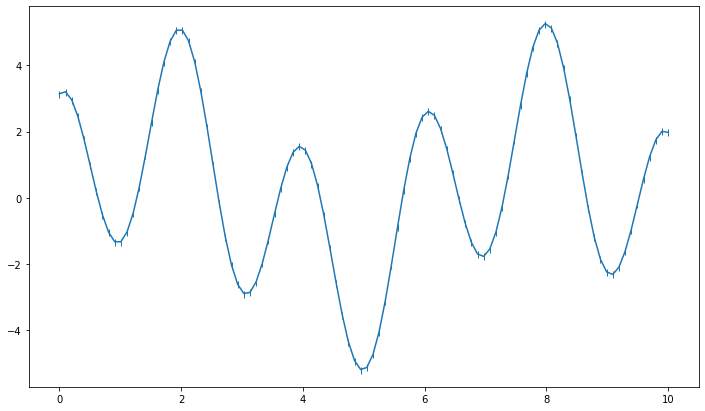

_	hline


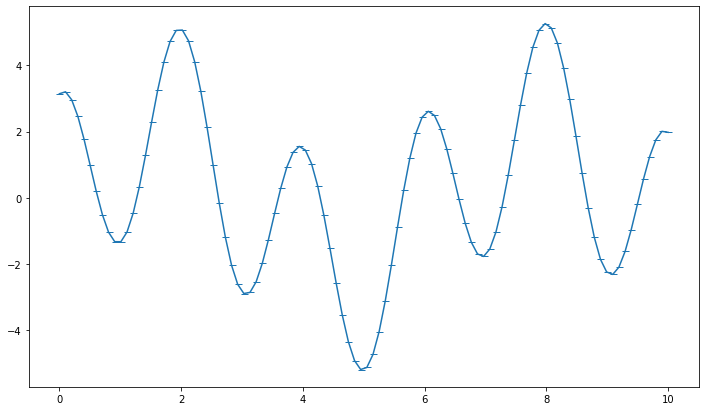

In [7]:
all_markers = {'.': 'point',',': 'pixel','o': 'circle','v': 'triangle_down','^': 'triangle_up','<': 'triangle_left','>': 'triangle_right','1': 'tri_down','2': 'tri_up','3': 'tri_left','4': 'tri_right','8': 'octagon','s': 'square','p': 'pentagon','*': 'star','h': 'hexagon1','H': 'hexagon2','+': 'plus','x': 'x','D': 'diamond','d': 'thin_diamond','|': 'vline','_': 'hline'}

markers = {'.': 'point', 'o': 'circle', 's': 'square', '*': 'star','h': 'hexagon1'}



for marker, marker_name in all_markers.items():
    print("{0}\t{1}".format(marker, marker_name))
    
    plt.figure(figsize=(12, 7))
    plt.plot(x, y, markersize=7, marker=marker)
    plt.show()

### Kontrola nad kreskami (ang. *ticks*) na osiach.
Domyślnie wartości na osiach (x czy y) są wypisywane w sposób liniowy, ale możesz to zmienić zaczynając od tego, że możesz je schować, wprowadzić jawnie, które punkty chcesz mieć lub nawet zrobić skalę logarytmiczną.

Więcej informacji w dokumentacji [Tick locating and formatting](https://bit.ly/3dqRiqd).

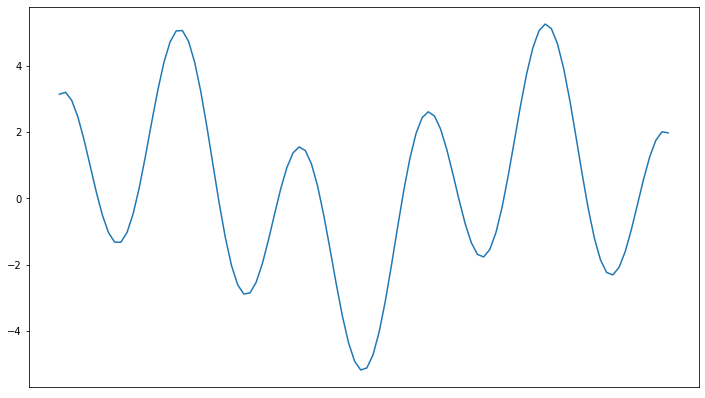

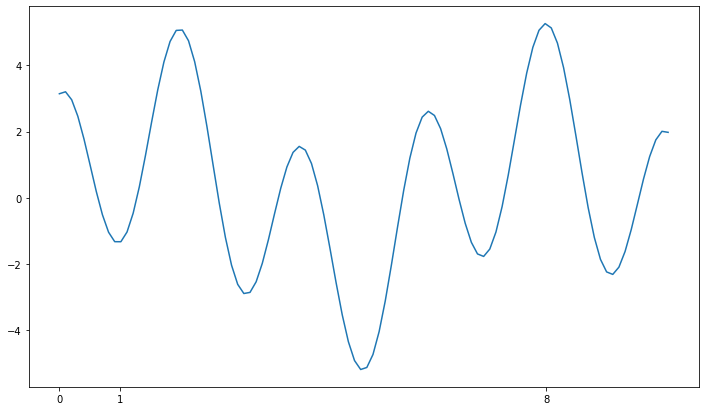

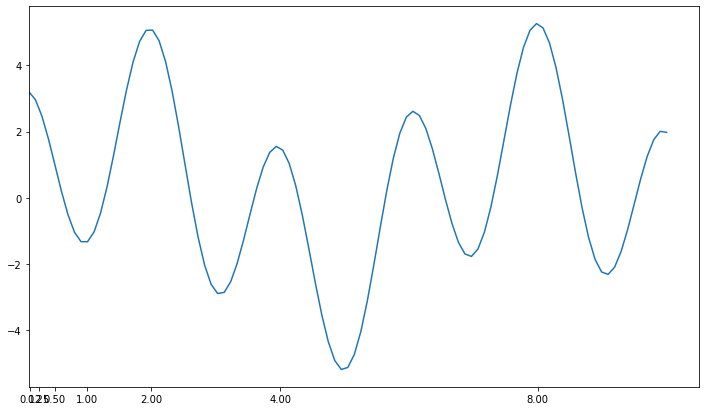

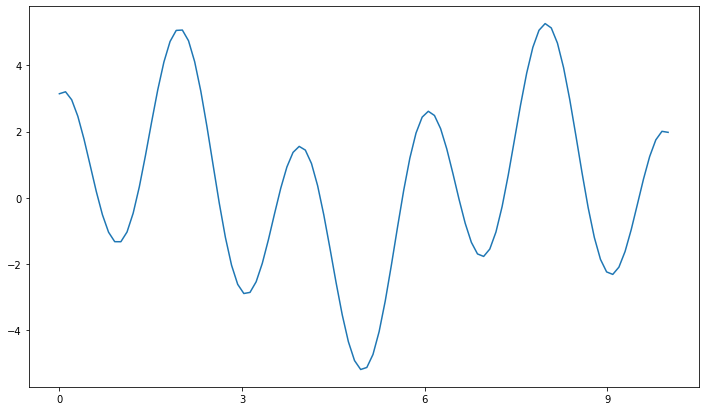

In [8]:
locators = [
    NullLocator(), #brak
    FixedLocator([0, 1, 8]), #zafiksowany, będzie tylko dla 0, 1 i 8
    LogLocator(2, [1.]), #skala logarytmiczna
    MultipleLocator(3.) #co trzeci
]

for locator in locators:
    print(str(locator))
    plt.figure(figsize=(12, 7))
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    plt.plot(x, y)
    plt.show()

### Wiele linii

Więcej niż jedna linia na jednym wykresie.

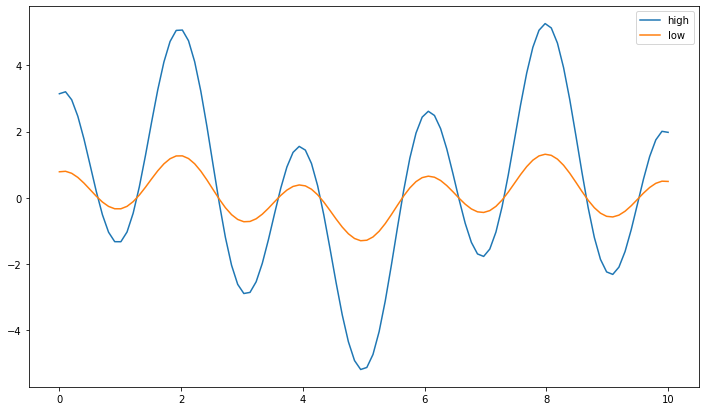

In [9]:
z = y / 4.0

plt.figure(figsize=(12, 7))
plt.plot(x, y, label="high")
plt.plot(x, z, label="low")

#dodanie legendy
plt.legend(loc='best'); #opcja "best" (można też wpisać po prostu 0) oznacza, że biblioteka samodzielnie poszukuje najlepszej możliwej opcji

### Komentarz / adnotacja (ang. *annotation*) 

Bardziej skomplikowanym przypadkiem jest, kiedy chcemy zaznaczyć wybrany punkt na wykresie i dodać komentarz.

Jako dodatek na wykresie poniżej dodajemy dwie linie: poziomą i pionową.

*Swoją drogą*, "biznes" (ludzie z biznesu) bardzo to lubi. Kiedy wskazujemy miejsce warte uwagi wykres nagle staje się zrozumiały. Pokazanie wyniku to ważna umiejętność - zwykle osoby techniczne mają z tym problem.

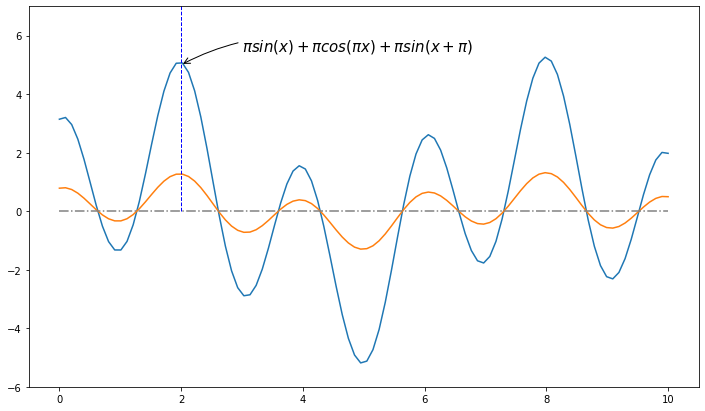

In [10]:
plt.figure(figsize=(12, 7))
plt.plot(x, y, label="high")
plt.plot(x, z, label="low")

plt.ylim(-6, 7)

plt.annotate(r'$\pi sin(x) + \pi cos(\pi x) + \pi sin(x + \pi )$',
            xy=(2, 5), xycoords='data',
            xytext=(+3, +5.5), textcoords='data', fontsize=15,
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"),
            )

plt.plot([0, 10], [0, 0], color='grey', linestyle='-.')
plt.plot([2, 2],[0, 10], color='blue', linewidth=1, linestyle="--");

## Anatomia matplotlib

![](../images/anatomy_matplotlib.png)

Powyżej jest obraz, który opisuje poszczególne elementy wykresu.

### Teraz dodajmy:
1. Tytuł
2. Agendę
3. Bardziej zaawansowany podpis na osi x ( 0, $+\pi$, $+2\pi$, $+3\pi$ )
4. Jawnie punkty na dwóch liniach (używając różnych markerów).

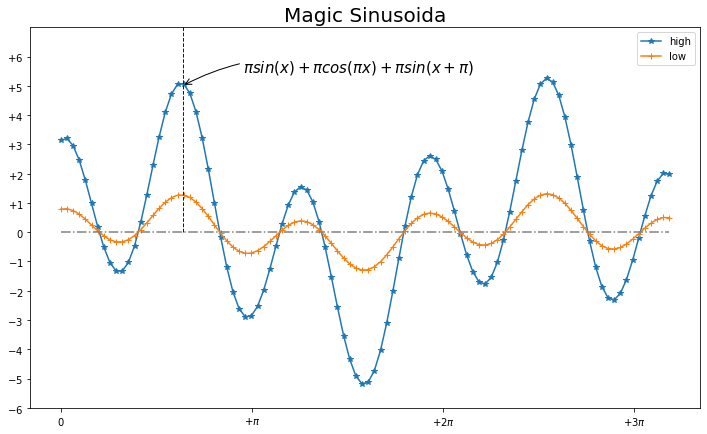

In [11]:
plt.figure(figsize=(12, 7))
plt.plot(x, y, label="high", marker='*')
plt.plot(x, z, label="low", marker='+')

plt.ylim(-6, 7)

plt.annotate(r'$\pi sin(x) + \pi cos(\pi x) + \pi sin(x + \pi )$',
            xy=(2, 5), xycoords='data',
            xytext=(+3, +5.5), textcoords='data', fontsize=15,
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"),
            )

plt.plot([0, 10], [0, 0], color='grey', linestyle='-.')
plt.plot([2, 2],[0, 10], color='blue', linewidth=1, linestyle="--")

plt.title("Magic Sinusoida", fontsize=20)
plt.xticks([0, np.pi, 2*np.pi, 3*np.pi],
          [r'$0$', r'$+\pi$', r'$+2\pi$', r'$+3\pi$'])

plt.yticks([-6, -5, -4, -3, -2, -1, 0, +1, +2, +3, +4, +5, +6], [r'$-6$', r'$-5$', r'$-4$', r'$-3$', r'$-2$', r'$-1$', r'$0$', r'$+1$', r'$+2$', r'$+3$', r'$+4$', r'$+5$', r'$+6$'])

plt.legend(loc='best');

## Zadanie 2.2.1

Przykład z życia wzięty... Zadanie wymaga więcej czasu, aby je wyjaśnić, niż je zrealizować. Natomiast celem jest pokazanie mniej standardowego zastosowania, żeby przyzwyczaić się do myślenia, że nawet logi można wizualizować.

Załóżmy że jest system, którego zadaniem jest wykonanie pewnej pracy. Załóżmy, że praca ta polega na renderowaniu plików pdf (z jakąś tam zawartością).

Proces zajmujący się wyrenderowaniem nowego pliku będziemy nazywać `job`. Istnieje kilka `workerów`, które mogą tworzyć nowe `joby`. W tym samym czasie tylko jeden `job` (wśród wszystkich `workerów`) może renderować, reszta musi oczekiwać... Działa to w następujący sposób. `Workery` budzą się w pewnym odstępie czasowym (żeby nie przeszkadzać sobie nawzajem), uwzględniając ile czasu zajmuje średni rendering.

Po "obudzeniu" `worker` tworzy nowego `joba` z czasem begin. Następnie jest sprawdzane - czy można zacząć render, jeśli nie (czyli zajęte) - to `job` idzie spać na losowy okres czasu - jak obudzi się, znowu sprawdza czy render jest wolny, i tak aż uda się wykonać zadanie.

Tak wygląda przykładowy log, w którym są pewne zdarzenia. Żeby przyspieszyć to zadanie, nie musisz parsować logów - zrobiłem to już za Ciebie.
Log zawiera następujące informacje.
- **begin** - czas, kiedy worker uruchomił job i zaczął sprawdzać, czy może zacząć render
- **finish** - czas, kiedy worker skończył job (włączając redner pdf)
- **start_processing** - czas, kiedy job zaczął render
- **offset_submit** - opóźnienie w sekundach, kiedy job narodził się (begin) w porównaniu do pierwszego (“joba”)
- **offset_processing** - opóźnienie w sekundach od momentu, kiedy job narodził się (begin) i faktycznie rozpoczął rendering (innymi słowy, jak długo musiał czekać na rozpoczęcie renderingu)
- **total_seconds** - ile czasu sumaryczne zajęło wykonanie joba

(0.0, 3000.0)

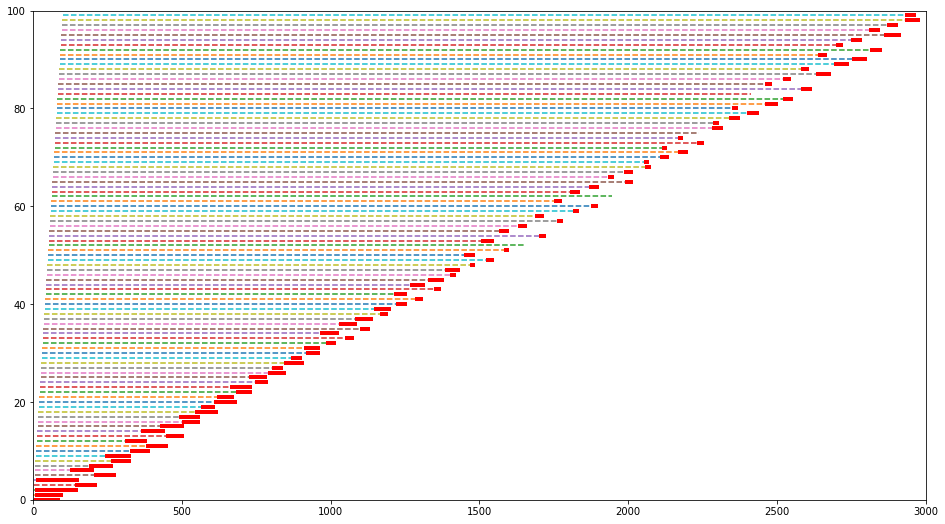

In [12]:
df = pd.read_csv('../input/load_test.csv') #wczytujemy dane

# df.head()

plt.figure(figsize = (16,9))
#może przyda się, jeśli ciężko będzie poradzić z odstępami :)
size = df.shape[0]
for x in range(size):
    plt.plot([df['offset_submit'].values[x], df['total_seconds'].values[x]], [x, x], linestyle='--')
    plt.plot([df['offset_processing'].values[x], df['total_seconds'].values[x]], [x, x], linestyle='-', color='r', linewidth=4)
plt.ylim(0, 100)
plt.xlim(0, 3000)

1. Masz narysować `n` linii, gdzie każda linia jest wierszem w pandas (czyli kolejny job).
2. Długość linii to `total_seconds`.
3. Odstęp linii po lewej stronie to `offset_submit`.
4. Czerwona końcówka na liniach, to jest `offset_processing` (odstęp kiedy zaczął się rendering), dla Ciebie to oznacza, że nadpiszesz dłuższą linię krótszą (czerwoną).

Dodatkowo objaśnię, co robi jedna linijka powyższego kodu. Jak wcześniej wspominałem, `plt.plot()` może przyjąć 2 argumenty: `x` i `y`, a następnie na ich podstawie rysuje linie, które łączą te punkty. `x` i `y` mogą być  również listami zawierającymi współrzędne dla kilku punktów (wtedy obie listy muszą być takiej samej długości, aby każdy punkt w liście podanej do `x` miał swój odpowiednik w liście podanej do `y`). 

Przykładowo `plt.plot([1, 2], [3, 4])` oznacza, że rysujemy 2 punkty. Jeden będzie miał współrzędne `x=1, y=3`, a drugi `x=2, y=4`. W powyższych linijkach kodu jako argumenty również są podane 2 listy z 2-oma wartościami (linijka jest wprawdzie długa, ale przyjrzyj się uważnie, gdzie się otwierają i kończą nawiasy `[]`). Żeby 2 punkty uformowały poziomą (bądź pionową) linię, to muszę mieć taką samą wartość na osi `y` (bądź `x`, jeśli linia ma być pionowa). Stąd te konstrukty `[0, 0]`, `[1, 1]` itd.. Mówią one że te 2 punkty podane w liście `x` mają być na tej samej wysokości. 

Jeśli nadal nie do końca czujesz, dlaczego musimy podać `[0, 0]`, `[1, 1]` itd., aby mieć poziomą (lub pionową) linię, to polecam wziąć kartkę papieru - narysuj osi x oraz y, następnie narysuj pionową lub poziomą linię i zobacz, jak zachowują się współrzędne na tych liniach :). 

##  Histogram, scatter plot, boxplot
Przejdźmy teraz do kształtów zwanych wykresami analitycznymi.

Poznaj kilka innych wykresów, które mogą być dla nas przydatne
- histogram
- boxplot
- scatterplot

Każdy z nich ma swoje wady i zalety. Histogram jest jednym z wykresów, którego używam najczęściej, więc od niego zaczniemy.

### [Histogram](https://bit.ly/3dp53G8)

Jak należy go odczytać? Histogram nakłada się na konkretną zmienną, np. wiek. W histogramie określamy, ile chcemy mieć koszyków, np. 10 czy 100. Załóżmy, że mamy 10 i wiek mamy od 0 do 100 (podobnie można żyć dłużej, ale na razie zostawmy to). To wtedy mamy 10 koszyków od 0 do 10, od 10 do 20, do 20 do 30 itd. 

Teraz naszym zadaniem jest poukładać dane w tych koszykach, np. jeśli mamy `Age=28`, to trafi do koszyka pomiędzy 20 a 30, jeśli `Age=42`, to trafia do koszyka pomiędzy 40 a 50. Innymi słowy, wszystkie nasze dane rozkładamy po koszykach i na końcu liczymy (czyli to jest oś Y), ile mamy danych w poszczególnych koszykach.

Poniżej jest przykład histogramu, akurat zrobiony na danych losowych (dlatego jest zmienny).

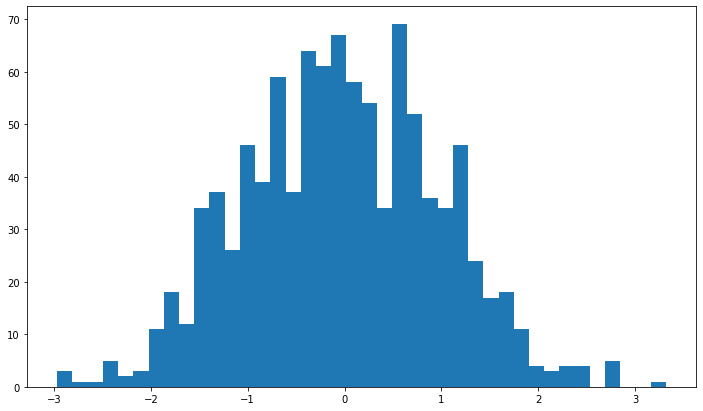

In [13]:
plt.figure(figsize=(12, 7))
plt.hist(np.random.randn(1000), bins=40);

### [Boxplot](https://bit.ly/3wkcpTH)

Ten wykres działa trochę inaczej niż histogram. Zawiera mniej informacji, bo tak naprawdę pokazuje tylko wartość minimalną, maksymalną, średnią i medianę.


W tym artykule znajdziesz więcej szczegółów na temat [boxplota](https://bit.ly/3fA3ac5). 

Zróbmy teraz wykres.

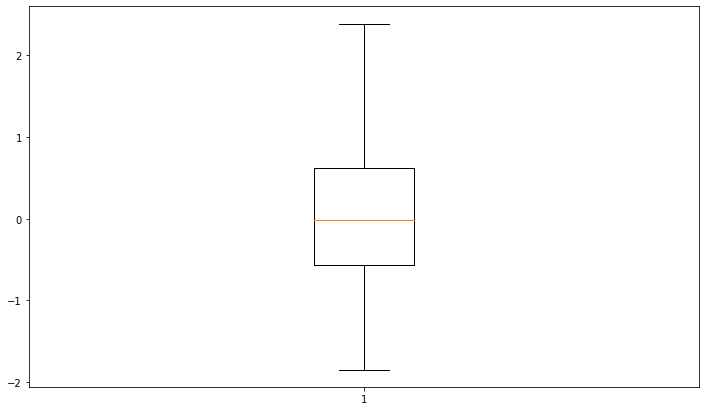

In [14]:
plt.figure(figsize=(12, 7))
plt.boxplot(np.random.randn(50));

Boxplot czasem jest szczególnie lubiany przez pewne grupy ludzi, bo jest wygodny przez to, że kompresuje wiedzę tylko do 4-5 liczb, czyli nie pokazuje prawdziwego rozkładu danych jak histogram. Chociaż czym mniej jest koszyków w histogramie, tym bardziej ma podobny problem jak boxplot.  Na skutek tego naprawdę potrafi być mylący. 

### [Scatter plot](https://bit.ly/2R18VWf)

Poznajmy jeszcze jeden dość przydatny sposób na wizualizację danych.

To podejście także ma swoje wady, np. jeśli mamy dane, które nakładają się na siebie, to nadal widzimy jedną "kropkę", ale za tą jedną może stać 10 kropek czy nawet 1000 kropek, po prostu wizualnie nałożyły się na siebie. To da się częściowo rozwiązać wprowadzając np. przezroczystość lub tak zwany trick "jitter", kiedy "rozrzucamy" kropki w sposób losowy z delikatnym krokiem, w wyniku czego próbujmy zminimalizować ryzyko wystąpienia sytuacji, że kropki nałożą się na siebie i przysłonią się.

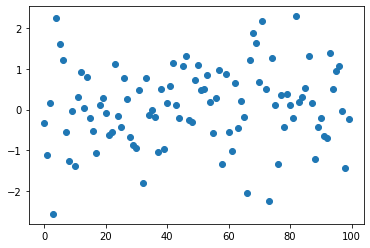

In [15]:
n = 100
plt.scatter(range(n), np.random.randn(n));

## Iris

Przykład wizualizacji na podstawie zbioru [iris](https://bit.ly/3dpLzRD).

![](../images/iris.png)

In [16]:
iris = d.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

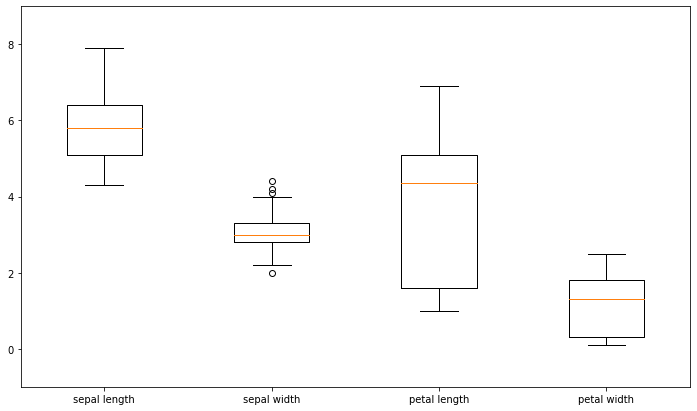

In [17]:
plt.figure(figsize=(12, 7))
plt.boxplot(iris.data)

plt.xticks(range(1, len(iris.data[0]) + 1), ['sepal length', 'sepal width', 'petal length', 'petal width'] )
plt.ylim(-1, 9);

Przedtem używaliśmy `matplotlib`. To jest niskopoziomowa biblioteka. Spójrzmy teraz na `Seaborn`, która jest bardziej deklaratywną biblioteką (gdzie bardziej mówimy "co zrobić", a mniej "jak to zrobić").

## Seaborn

To jest biblioteka, która pod spodem również używa matplotlib, ale pozwala robić bardziej złożone wykresy w prostszy sposób. Chociaż jak to zwykle bywa - coś za coś ;). Jeśli akurat chcesz zrobić coś innego, niż zaplanował w swoich szablonach autor `seaborn`, to już będzie trudno i trzeba będzie cofnąć się do matplotliba. 

Dlatego warto poznać co najmniej te dwie biblioteki.

Najpierw wykres `displot()`.

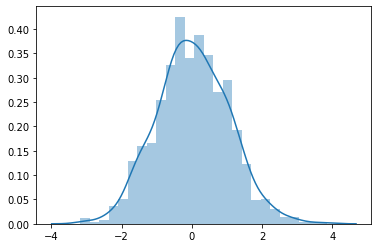

In [18]:
sns.distplot(np.random.randn(1000));

Na tym wykresie masz kilka rzeczy. Pierwsza, to histogram i też możesz zmieniać liczbę koszyków. Spróbujmy to zmienić.

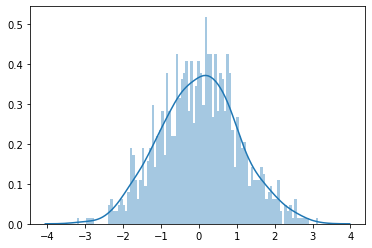

In [19]:
sns.distplot(np.random.randn(1000), bins=100);

Również histogram można wyłączyć w taki sposób:

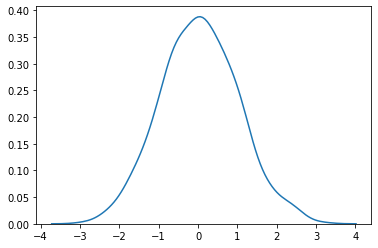

In [20]:
sns.distplot(np.random.randn(1000), hist=False);

Zostaje nam wtedy estymator gęstości, więcej o tym można [poczytać tutaj](https://bit.ly/3sOnGtA). Dodatkowo można włączyć [`rug plot`](https://bit.ly/3fAYinm).

Uwaga! Jeśli słyszysz o tym po raz pierwszy, to nie próbuj zrozumieć wszystkiego naraz. Będzie fajnie, jeśli zobaczysz i będziesz wiedzieć, że takie coś jest (tym samym zmniejsza się twoje "nie wiem, czego nie wiem").

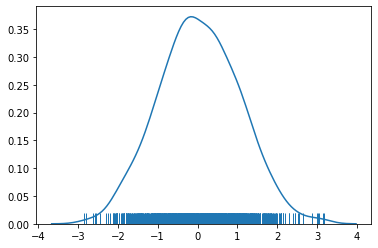

In [21]:
sns.distplot(np.random.randn(1000), hist=False, rug=True);

## Iris

Wróćmy do zbioru `iris`. Zróbmy scatter plot, ale trochę rozbudowany, czyli na bokach jeszcze będą histogramy, czyli `jointplot()`.

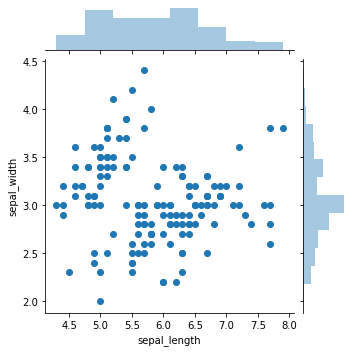

In [22]:
iris = sns.load_dataset("iris")

sns.jointplot(x="sepal_length", y="sepal_width", data=iris, height=5);

Można "kropki" pokolorować w zależności od klasy, do której należą (w naszym przypadku mamy 3 klasy).

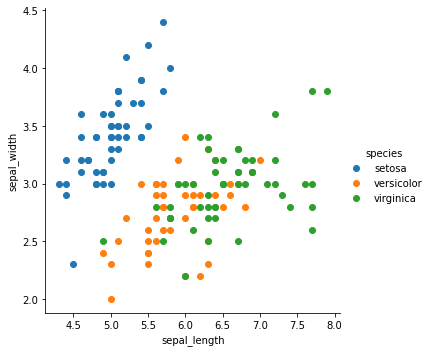

In [23]:
sns.FacetGrid(iris, hue="species", height=5) \
  .map(plt.scatter, "sepal_length", "sepal_width") \
  .add_legend();

Też można zrobić `.boxplot()`.

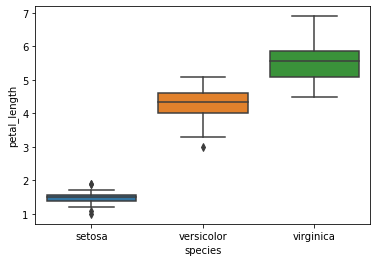

In [24]:
sns.boxplot(x="species", y="petal_length", data=iris);

Teraz `.stripplot()`, który jest szczególnym przypadkiem `scatterplot()`.

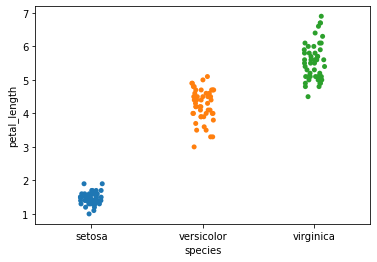

In [25]:
sns.stripplot(x="species", y="petal_length", data=iris);

Nałóżmy teraz jeszcze mechanizm `jitter`, czyli losowanie, dzięki czemu kropki będą się mniej pokrywały. W tym przypadku akurat to nie jest aż tak bardzo zauważalne, ale warto wiedzieć, że taki parameter istnieje.

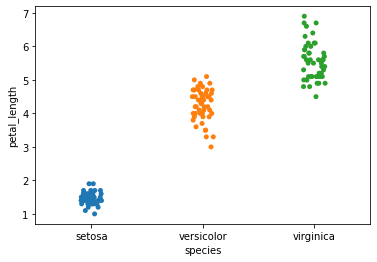

In [26]:
sns.stripplot(x="species", y="petal_length", jitter=True, data=iris);

W skrajnym przypadku: scatterplot + jitter to `.swarmplot()`. W tym przypadku mamy gwarancję, że za każdą kropką stoi pojedyncza kropka. Tylko to podejście też ma wady. Jak myślisz jakie?

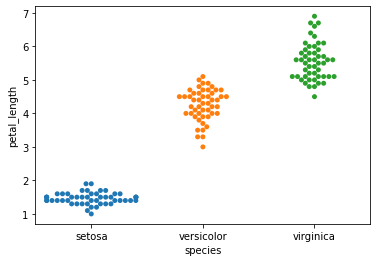

In [27]:
sns.swarmplot(x="species", y="petal_length", data=iris);

Można zrobić szereg `.boxplot()` w jednym miejscu i tak to będzie wyglądało:

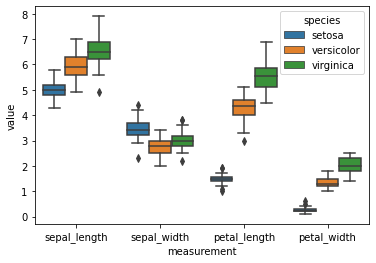

In [28]:
melt_iris = pd.melt(iris, "species", var_name="measurement")
sns.boxplot(x="measurement", y="value", hue="species", data=melt_iris);

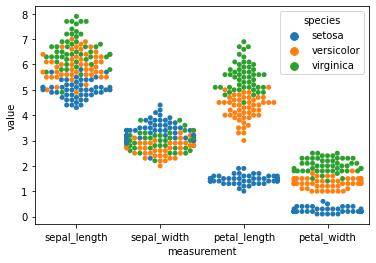

In [29]:
sns.swarmplot(x="measurement", y="value", hue="species", data=melt_iris);

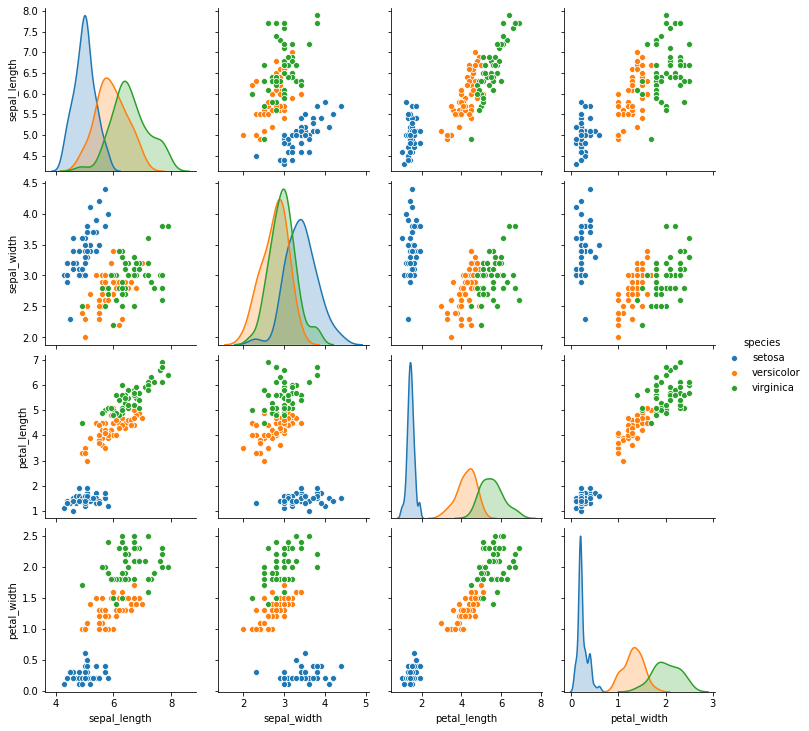

In [30]:
sns.pairplot(iris, hue="species");

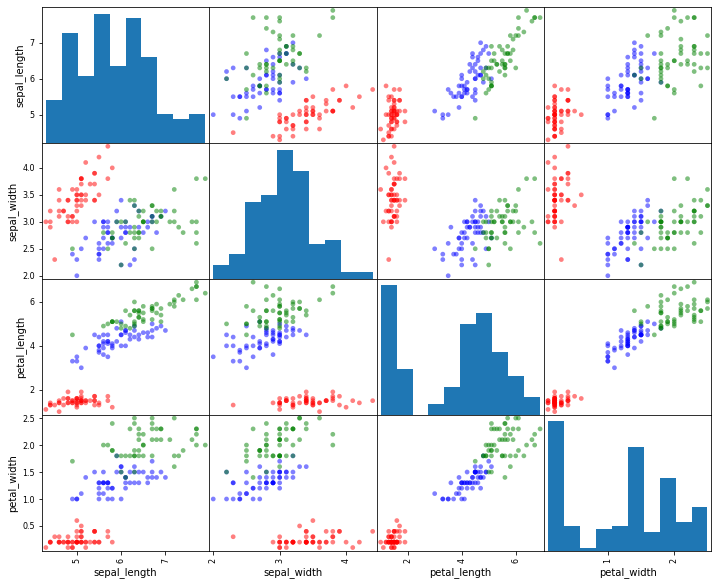

In [34]:
cmaps = dict(zip(iris.species.unique(), ['red', 'blue', 'green']))

scatter_matrix(iris, c=iris.species.map(lambda x: cmaps[x]), s=90, figsize=(12, 10));

## Przydatne linki:
1. [Anatomy of Matplotlib](https://bit.ly/31TrGND)
2. [Overview of Python Visualization Tools](https://bit.ly/3cO6n6p)
3. [The Python Visualization Landscape](https://bit.ly/3fxbqK9)
4. [Python Seaborn wizualizacja danych na sterydach](https://bit.ly/3fB57Fe)
5. [How To Think Visually Using Visual Analogies – Infographic](https://bit.ly/31IDaTM)
6. [Visualizing Patterns on Repeat](https://bit.ly/3umjYaZ)
7. [Your Friendly Guide to Colors in Data Visualisation](https://bit.ly/3dt32IT)
